In [1]:
# load libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read data 
data = pd.read_csv('../../data/filled_bridge_statistic_germany.csv', sep=';')

# exclude non numeric columns
data_pca = data.select_dtypes(include=['number'])
data_pca = data_pca.drop(columns=['Unnamed: 0'])

# remove rows with 'Traglastindex' == 0
data_pca = data_pca[data_pca['Traglastindex'] != 0]

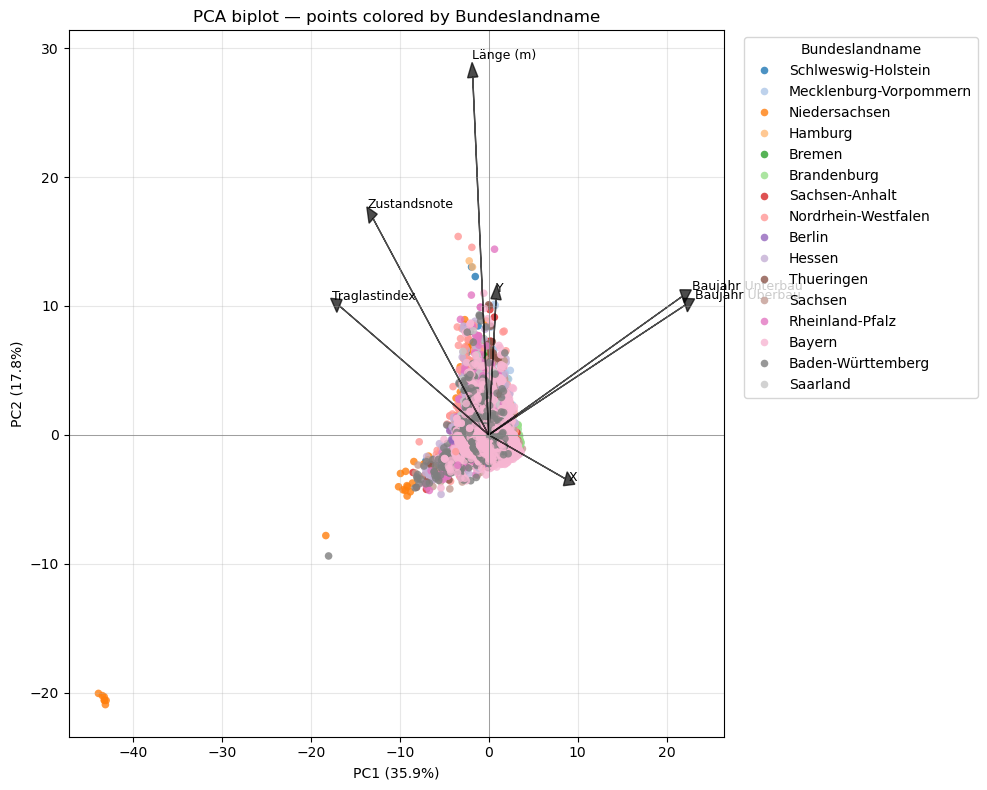

In [12]:
# perform PCA with coordinates
# remove rows with any NaN values
data_pca1 = data_pca.dropna()
idx1 = data_pca1.index

# scale and run PCA
scaler = StandardScaler()
X = scaler.fit_transform(data_pca1)
pca = PCA(n_components=2)
scores = pca.fit_transform(X)
explained = pca.explained_variance_ratio_

# assemble PCA results DataFrame (keep original indices)
pca_df = pd.DataFrame(scores, index=idx1, columns=['PC1', 'PC2'])

# compute loadings (feature directions)
loadings = pca.components_.T # shape: n_features x 2
features = data_pca1.columns.tolist()

# scale arrows so they are visible on the scatter
max_score = np.sqrt((pca_df**2).sum(axis=1)).max()
arrow_scale = max_score * 0.8

plt.figure(figsize=(10,8))
# scatter colored by Bundeslandname (categorical)
sns.scatterplot(x='PC1', y='PC2',
                hue=data.loc[idx1, 'Bundeslandname'],
                palette='tab20',
                data=pca_df,
                s=30, alpha=0.8, linewidth=0)
# draw feature arrows and labels
for i, feat in enumerate(features): 
    lx, ly = loadings[i, 0], loadings[i, 1]
    plt.arrow(0, 0, lx * arrow_scale, ly * arrow_scale,
              color='black', alpha=0.7, head_width=0.03 * arrow_scale, head_length=0.03 * arrow_scale)
    plt.text(lx * arrow_scale * 1.05, ly * arrow_scale * 1.05, feat,
             color='black', fontsize=9)

plt.xlabel(f"PC1 ({explained[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}%)")
plt.title('PCA biplot — points colored by Bundeslandname')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Bundeslandname')
plt.tight_layout()
plt.show()

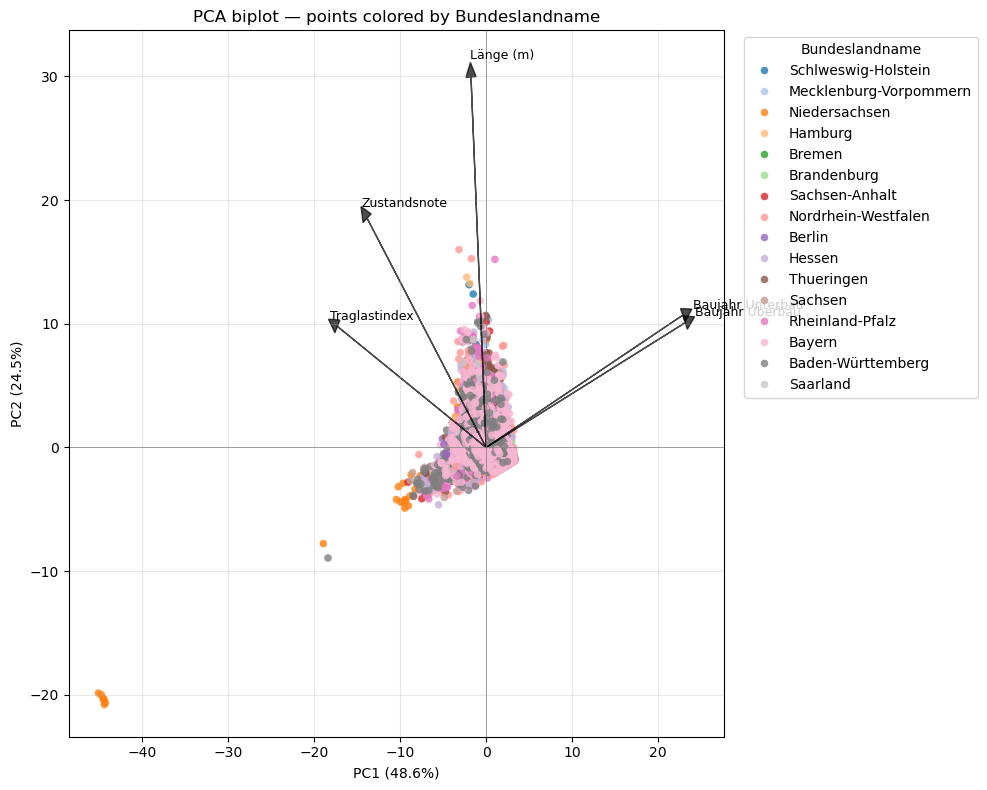

In [11]:
# perform PCA without coordinates
# remove X and Y columns
data_pca2 = data_pca.drop(columns=['X', 'Y'])
idx2 = data_pca2.index

# scale and run PCA
scaler = StandardScaler()
X = scaler.fit_transform(data_pca2)
pca = PCA(n_components=2)
scores = pca.fit_transform(X)
explained = pca.explained_variance_ratio_

# assemble PCA results DataFrame (keep original indices)
pca_df = pd.DataFrame(scores, index=idx2, columns=['PC1', 'PC2'])

# compute loadings (feature directions)
loadings = pca.components_.T # shape: n_features x 2
features = data_pca2.columns.tolist()

# scale arrows so they are visible on the scatter
max_score = np.sqrt((pca_df**2).sum(axis=1)).max()
arrow_scale = max_score * 0.8

plt.figure(figsize=(10,8))
# scatter colored by Bundeslandname (categorical)
sns.scatterplot(x='PC1', y='PC2',
                hue=data.loc[idx2, 'Bundeslandname'],
                palette='tab20',
                data=pca_df,
                s=30, alpha=0.8, linewidth=0)
# draw feature arrows and labels
for i, feat in enumerate(features): 
    lx, ly = loadings[i, 0], loadings[i, 1]
    plt.arrow(0, 0, lx * arrow_scale, ly * arrow_scale,
              color='black', alpha=0.7, head_width=0.03 * arrow_scale, head_length=0.03 * arrow_scale)
    plt.text(lx * arrow_scale * 1.05, ly * arrow_scale * 1.05, feat,
             color='black', fontsize=9)

plt.xlabel(f"PC1 ({explained[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}%)")
plt.title('PCA biplot — points colored by Bundeslandname')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Bundeslandname')
plt.tight_layout()
plt.show()